In [1]:
# Importing the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importing the dataset

df = pd.read_csv("jobs_in_data.csv")

In [3]:
# Checking first few initial records of the dataset

df.head()

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2023,Data DevOps Engineer,Data Engineering,EUR,88000,95012,Germany,Mid-level,Full-time,Hybrid,Germany,L
1,2023,Data Architect,Data Architecture and Modeling,USD,186000,186000,United States,Senior,Full-time,In-person,United States,M
2,2023,Data Architect,Data Architecture and Modeling,USD,81800,81800,United States,Senior,Full-time,In-person,United States,M
3,2023,Data Scientist,Data Science and Research,USD,212000,212000,United States,Senior,Full-time,In-person,United States,M
4,2023,Data Scientist,Data Science and Research,USD,93300,93300,United States,Senior,Full-time,In-person,United States,M


In [4]:
# Checking the shape of the dataset (Rows x Columns)

df.shape

(9355, 12)

In [5]:
# Checking the dataset information in terms of columns

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9355 entries, 0 to 9354
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           9355 non-null   int64 
 1   job_title           9355 non-null   object
 2   job_category        9355 non-null   object
 3   salary_currency     9355 non-null   object
 4   salary              9355 non-null   int64 
 5   salary_in_usd       9355 non-null   int64 
 6   employee_residence  9355 non-null   object
 7   experience_level    9355 non-null   object
 8   employment_type     9355 non-null   object
 9   work_setting        9355 non-null   object
 10  company_location    9355 non-null   object
 11  company_size        9355 non-null   object
dtypes: int64(3), object(9)
memory usage: 877.2+ KB


In [6]:
# Description of dataset in terms on statistics

df.describe()

,work_year,salary,salary_in_usd
count,9355.000000,9355.000000,9355.000000
mean,2022.760449,149927.981293,150299.495564
std,0.519470,63608.835387,63177.372024
min,2020.000000,14000.000000,15000.000000
25%,2023.000000,105200.000000,105700.000000
50%,2023.000000,143860.000000,143000.000000
75%,2023.000000,187000.000000,186723.000000
max,2023.000000,450000.000000,450000.000000


In [7]:
# Checking for null values

df.isnull().sum()

work_year             0
job_title             0
job_category          0
salary_currency       0
salary                0
salary_in_usd         0
employee_residence    0
experience_level      0
employment_type       0
work_setting          0
company_location      0
company_size          0
dtype: int64

In [8]:
# Checking for duplicate values

df.duplicated().sum()

4014

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
# Rechecking for duplicate values

df.duplicated().sum()

0

In [11]:
# Checking for Unique values in Columns

df.nunique()

work_year                4
job_title              125
job_category            10
salary_currency         11
salary                1507
salary_in_usd         1786
employee_residence      83
experience_level         4
employment_type          4
work_setting             3
company_location        70
company_size             3
dtype: int64

In [12]:
# Checking all columns

df.columns

for i in df.columns:
    print(i)

work_year
job_title
job_category
salary_currency
salary
salary_in_usd
employee_residence
experience_level
employment_type
work_setting
company_location
company_size


In [13]:
# Checking for unique job categories

unique_job_categories = df["job_category"].unique()

for i in unique_job_categories:
    print(i)

Data Engineering
Data Architecture and Modeling
Data Science and Research
Machine Learning and AI
Data Analysis
Leadership and Management
BI and Visualization
Data Quality and Operations
Data Management and Strategy
Cloud and Database


In [14]:
unique_job_titles = df["job_title"].unique()

print(unique_job_titles)

['Data DevOps Engineer' 'Data Architect' 'Data Scientist'
 'Machine Learning Researcher' 'Data Engineer' 'Machine Learning Engineer'
 'Data Analyst' 'Analytics Engineer' 'Applied Scientist' 'BI Developer'
 'Business Intelligence Engineer' 'Research Scientist' 'Research Analyst'
 'Research Engineer' 'Data Science Engineer' 'Data Quality Analyst'
 'Data Product Manager' 'Machine Learning Scientist' 'AI Engineer'
 'MLOps Engineer' 'Deep Learning Engineer' 'Data Modeler'
 'Data Product Owner' 'Data Science Consultant'
 'Business Intelligence Analyst' 'AI Developer' 'Data Manager'
 'ML Engineer' 'Data Science Director' 'Head of Data' 'BI Analyst'
 'Data Management Analyst' 'Machine Learning Modeler' 'Data Specialist'
 'BI Data Analyst' 'Data Integration Engineer'
 'Business Intelligence Manager' 'Data Integration Specialist'
 'Data Science Practitioner' 'Business Intelligence Developer'
 'AI Research Engineer' 'Data Lead' 'Data Management Specialist'
 'AI Architect' 'Data Science Manager' '

## Exploratory Data Analysis

Out of the columns in the dataset,
- `work_year`
- `salary`
- `salary_in_usd`<br>
<br>
are the numerical values.<br>
Rest of the columns are categorical in nature.

Since there are two columns for salary, we choose `salary_in_usd` because US currency is standard in this dataset.

<AxesSubplot:xlabel='salary_in_usd', ylabel='Count'>

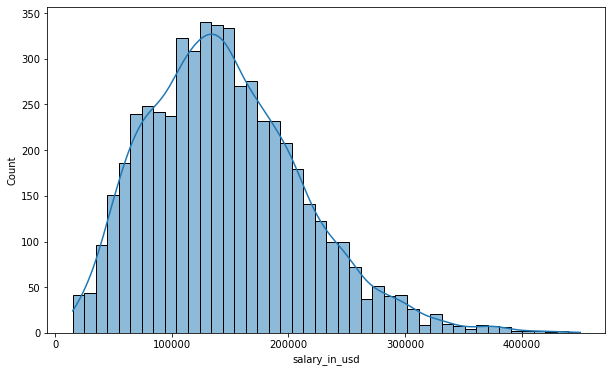

In [162]:
# Distribution of Salary across the count of employees

plt.figure(figsize = (10,6))
sns.histplot(df["salary_in_usd"], kde = "True")

In [185]:
print("Mean salary:", df["salary_in_usd"].mean(), "Median salary: ", df["salary_in_usd"].median())

Mean salary: 146258.40909941957 Median salary:  140000.0


In [183]:
print("Maximum salary is:", df["salary_in_usd"].max(), "Minimum salary is:", df["salary_in_usd"].min())

Maximum salary is: 450000 Minimum salary is: 15000


__EDA on basis of `job_category`__

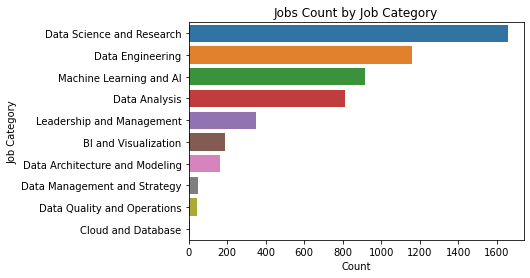

In [16]:
# Jobs count by Job Category

sns.countplot(y = "job_category", data = df, order = df["job_category"].value_counts(ascending = False).index)

plt.title("Jobs Count by Job Category")
plt.xlabel("Count")
plt.ylabel("Job Category")
plt.show()

In [17]:
df["job_category"].value_counts()

Data Science and Research         1655
Data Engineering                  1160
Machine Learning and AI            917
Data Analysis                      809
Leadership and Management          351
BI and Visualization               188
Data Architecture and Modeling     162
Data Management and Strategy        49
Data Quality and Operations         45
Cloud and Database                   5
Name: job_category, dtype: int64

In [188]:
# Grouping job_category with mean salary_in_usd

df_jc = df.groupby(["job_category"], as_index = False)["salary_in_usd"].mean().sort_values(by = "salary_in_usd", ascending = False)

In [189]:
df_jc

,job_category,salary_in_usd
9,Machine Learning and AI,170453.221374
7,Data Science and Research,157131.039879
3,Data Architecture and Modeling,157054.006173
1,Cloud and Database,155000.000000
8,Leadership and Management,149020.108262
4,Data Engineering,142967.543103
0,BI and Visualization,128377.734043
5,Data Management and Strategy,107655.836735
2,Data Analysis,106707.058096
6,Data Quality and Operations,104586.022222


(array([     0.,  20000.,  40000.,  60000.,  80000., 100000., 120000.,
        140000., 160000., 180000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

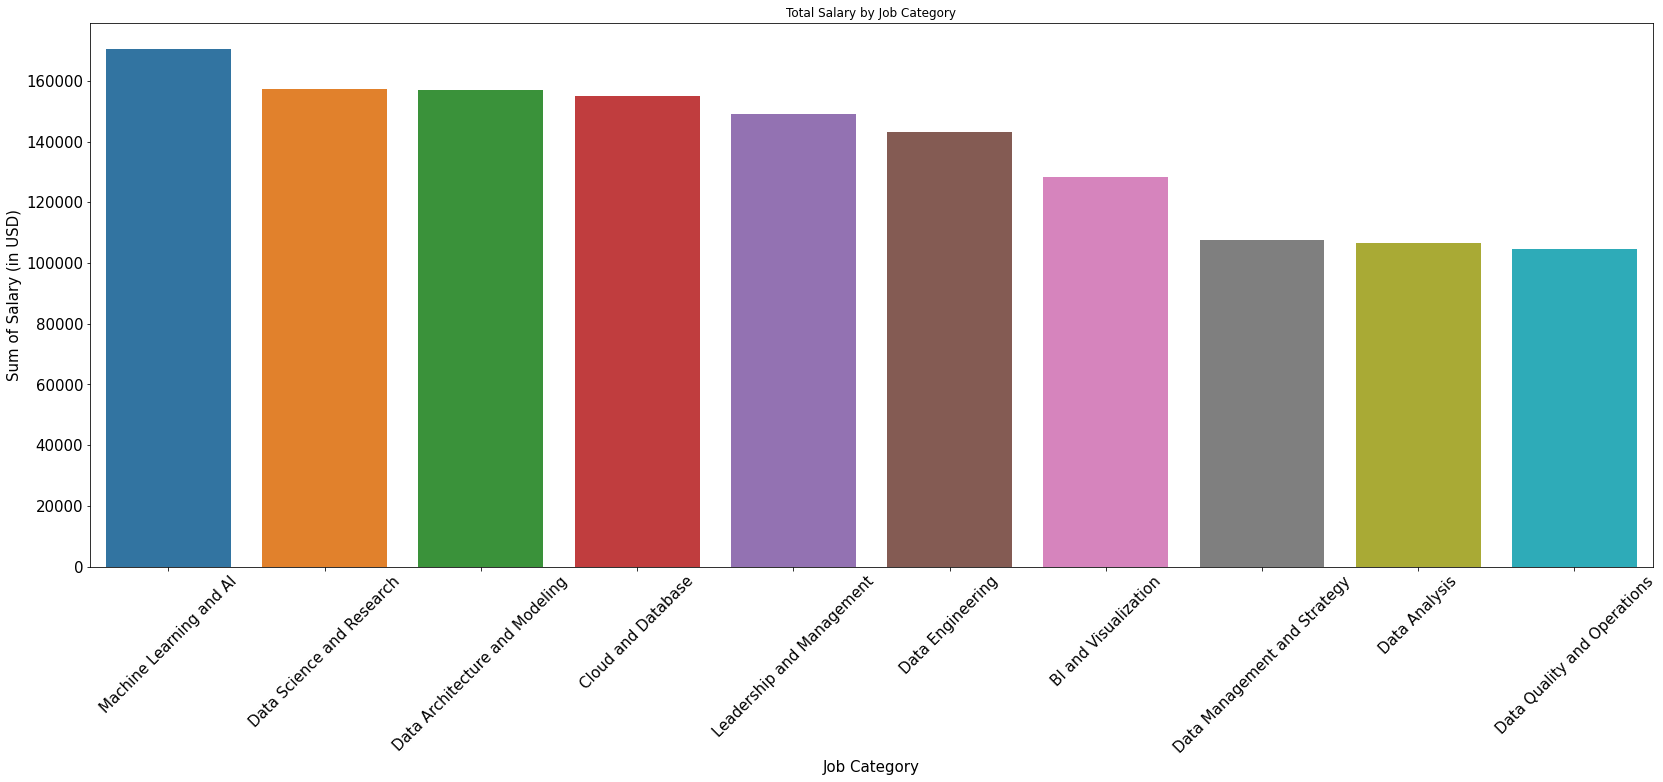

In [190]:
plt.figure(figsize = (28,10))
sns.barplot(x = "job_category", y = "salary_in_usd", data = df_jc)
plt.title("Total Salary by Job Category")
plt.xlabel("Job Category", size = 15)
plt.ylabel("Sum of Salary (in USD)", size = 15)
plt.xticks(rotation = "45", size = 15)
plt.yticks(size = 15)

In [187]:
df["job_category"].value_counts().index

Index(['Data Science and Research', 'Data Engineering',
       'Machine Learning and AI', 'Data Analysis', 'Leadership and Management',
       'BI and Visualization', 'Data Architecture and Modeling',
       'Data Management and Strategy', 'Data Quality and Operations',
       'Cloud and Database'],
      dtype='object')

- work_year

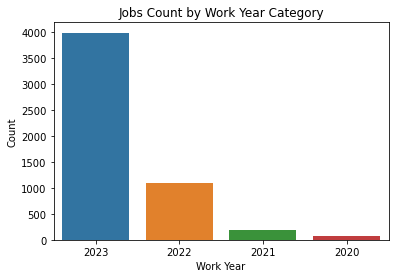

In [118]:
sns.countplot(x = "work_year", data = df, order = df["work_year"].value_counts(ascending = False).index)

plt.title("Jobs Count by Work Year Category")
plt.xlabel("Work Year")
plt.ylabel("Count")
plt.show()

In [119]:
df["work_year"].value_counts()

2023    3980
2022    1095
2021     195
2020      71
Name: work_year, dtype: int64

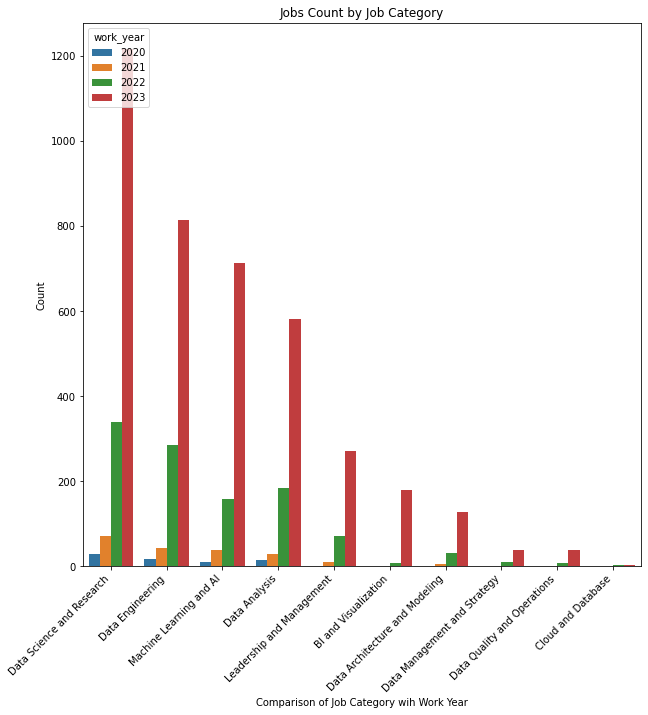

In [120]:
# Comparison of job_category with work_year

plt.figure(figsize = (10,10))

sns.countplot(x = "job_category", data = df, hue = "work_year", order = df["job_category"].value_counts(ascending = False).index)

plt.title("Jobs Count by Job Category")
plt.xticks(rotation = 45, horizontalalignment = "right")
plt.xlabel("Comparison of Job Category wih Work Year")
plt.ylabel("Count")
plt.show()

- employment_type

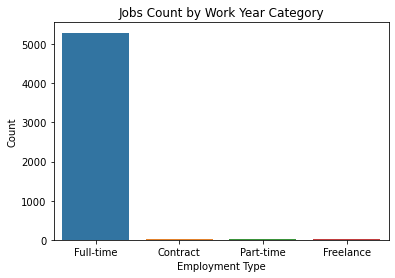

In [277]:
sns.countplot(x = "employment_type", data = df, order = df["employment_type"].value_counts(ascending = False).index)

plt.title("Jobs Count by Work Year Category")
plt.xlabel("Employment Type")
plt.ylabel("Count")
plt.show()

In [97]:
df["employment_type"].value_counts()

Full-time    5296
Contract       19
Part-time      15
Freelance      11
Name: employment_type, dtype: int64

In [98]:
# Grouping by employment_type and mean of salary_in_usd

df_et = df.groupby(["employment_type"], as_index = False)["salary_in_usd"].mean().sort_values("salary_in_usd", ascending = False)
df_et

,employment_type,salary_in_usd
2,Full-time,146805.237727
0,Contract,117109.368421
3,Part-time,57866.066667
1,Freelance,53868.636364


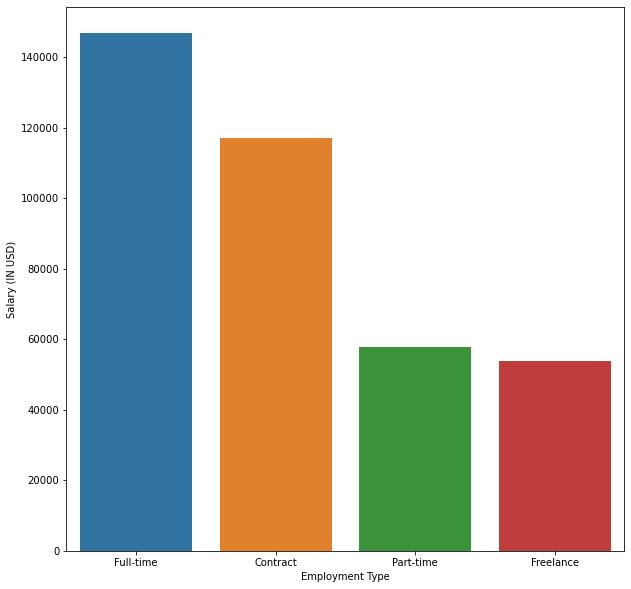

In [121]:
plt.figure(figsize = (10,10))
sns.barplot(x = "employment_type", y = "salary_in_usd", data = df_et)
plt.xlabel("Employment Type")
plt.ylabel("Salary (IN USD)")
plt.show()

- employee_residence

In [122]:
# Checking value counts

df["employee_residence"].value_counts().head(10)

United States     4255
United Kingdom     351
Canada             196
Germany             65
Spain               63
France              53
Portugal            26
Netherlands         21
Italy               20
Brazil              19
Name: employee_residence, dtype: int64

In [123]:
# We group by employee_residence with salary_in_usd

df_er = df.groupby(["employee_residence"], as_index = False)["salary_in_usd"].mean().sort_values("salary_in_usd", ascending = False)
df_er

,employee_residence,salary_in_usd
61,Qatar,300000.000000
47,Malaysia,200000.000000
60,Puerto Rico,166000.000000
80,United States,158529.642068
12,Canada,140447.897959
...,...,...
65,Serbia,25532.000000
32,Honduras,20000.000000
17,Costa Rica,20000.000000
23,Ecuador,16000.000000


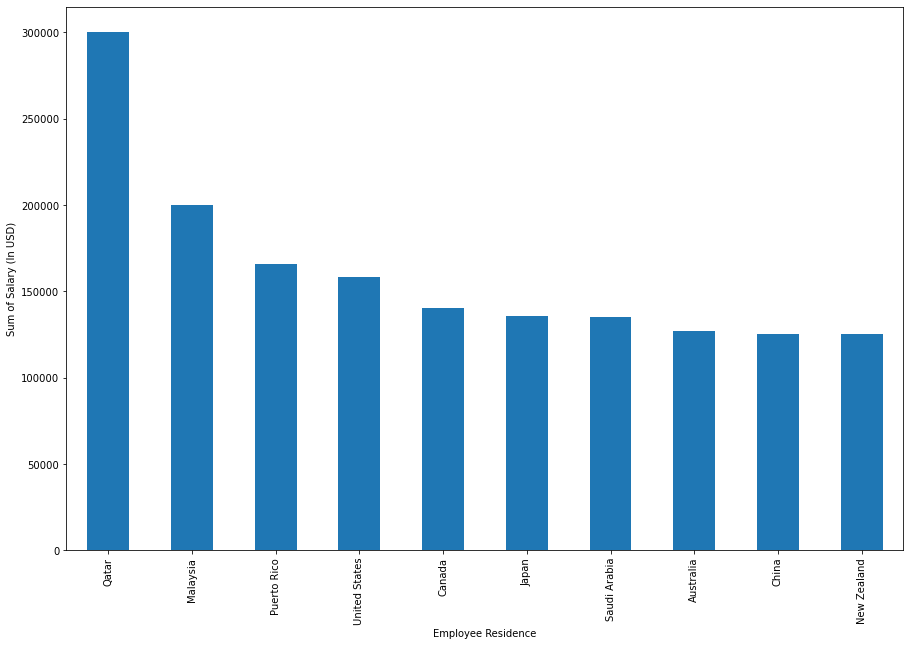

In [124]:
# We got 83 rows above, so let's do visualization for top 10 in this columnar data

plt.figure(figsize = (15,10))
df_er = df.groupby(["employee_residence"])["salary_in_usd"].mean(10).nlargest(10).sort_values(ascending = False).plot(kind = "bar")
plt.xlabel("Employee Residence")
plt.ylabel("Sum of Salary (In USD)")
plt.show()

-    __experience_level__

In [103]:
df["experience_level"].value_counts()

Senior         3444
Mid-level      1274
Entry-level     400
Executive       223
Name: experience_level, dtype: int64

In [104]:
df_el = df.groupby(["experience_level"], as_index = False)["salary_in_usd"].mean().sort_values("salary_in_usd", ascending = False)
df_el

,experience_level,salary_in_usd
1,Executive,187518.901345
3,Senior,161823.012195
2,Mid-level,116284.335165
0,Entry-level,84711.877500


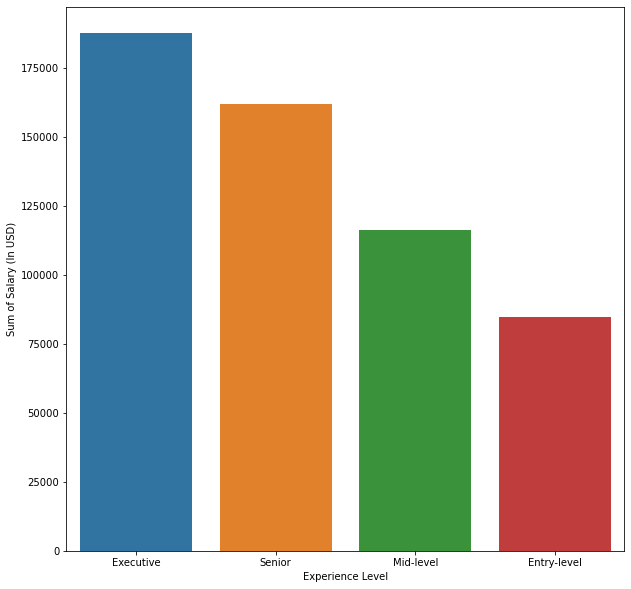

In [105]:
plt.figure(figsize = (10,10))
sns.barplot(x = "experience_level", y = "salary_in_usd", data = df_el)
plt.xlabel("Experience Level")
plt.ylabel("Sum of Salary (In USD)")
plt.show()

In [106]:
df["work_setting"].value_counts()

In-person    2913
Remote       2239
Hybrid        189
Name: work_setting, dtype: int64

In [107]:
df["company_location"].value_counts()

United States     4301
United Kingdom     358
Canada             198
Germany             71
Spain               59
                  ... 
Gibraltar            1
Ecuador              1
Andorra              1
Mauritius            1
Malta                1
Name: company_location, Length: 70, dtype: int64

- company_size

In [108]:
# Count on basis of company size

df["company_size"].value_counts()

M    4688
L     495
S     158
Name: company_size, dtype: int64

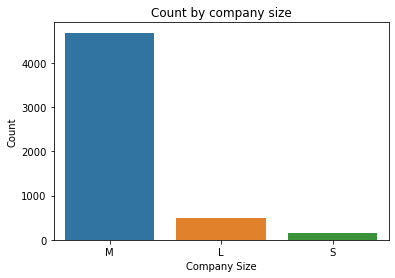

In [112]:
sns.countplot(x = "company_size", data = df, order = df["company_size"].value_counts(ascending = False).index)
plt.title("Count by company size")
plt.xlabel("Company Size")
plt.ylabel("Count")
plt.show()

In [110]:
df_cs = df.groupby(["company_size"], as_index = False)["salary_in_usd"].mean().sort_values("salary_in_usd", ascending = False)
df_cs

,company_size,salary_in_usd
1,M,150289.504266
0,L,125767.260606
2,S,90849.196203


<AxesSubplot:xlabel='company_size', ylabel='salary_in_usd'>

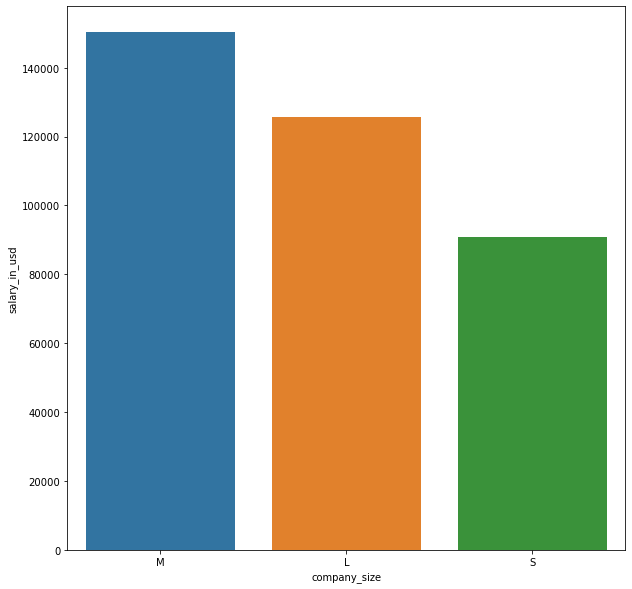

In [74]:
plt.figure(figsize = (10,10))
sns.barplot(x = "company_size", y = "salary_in_usd", data = df_cs)

In [75]:
df[df["job_category"] == "Data Engineering"].groupby("work_year")["job_category"].count()

work_year
2020     17
2021     44
2022    286
2023    813
Name: job_category, dtype: int64

<AxesSubplot:xlabel='experience_level', ylabel='salary_in_usd'>

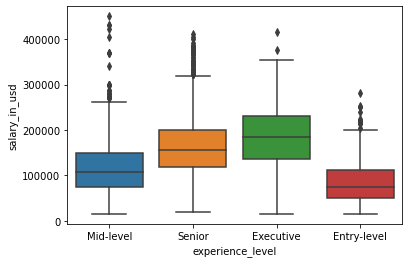

In [78]:
sns.boxplot(data = df, x = "experience_level", y = "salary_in_usd")

Text(0.5, 0, 'Comparison of Experience Level, Salary (In USD) and Work Year')

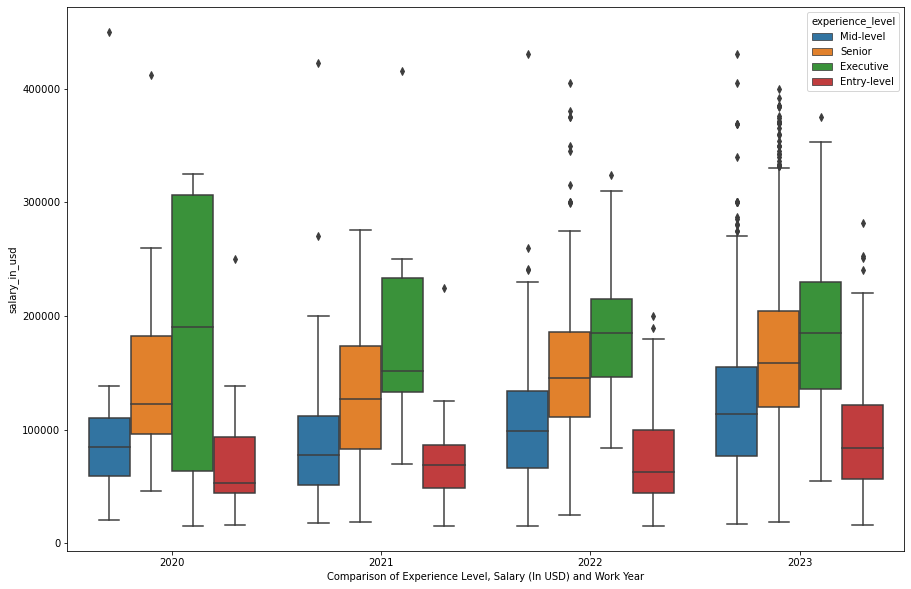

In [83]:
# Comparing experience_level , work_year and salary_in_usd

plt.figure(figsize = (15,10))
sns.boxplot(data = df, x = "work_year", y = "salary_in_usd", hue = "experience_level")
plt.xlabel("Comparison of Experience Level, Salary (In USD) and Work Year")

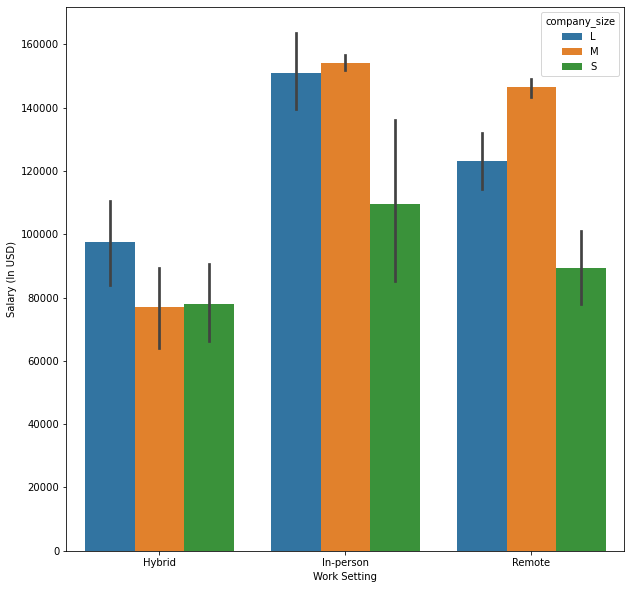

In [278]:
# Salary, Work Setting and Company Size

plt.figure(figsize = (10,10))
sns.barplot(x = "work_setting", y = "salary_in_usd", hue = "company_size", data = df)
plt.xlabel("Work Setting")
plt.ylabel("Salary (In USD)")
plt.show()

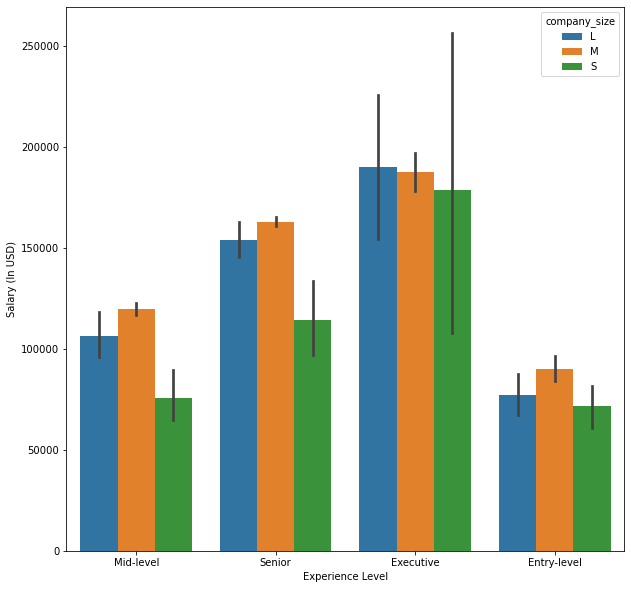

In [161]:
# Salary, Experience Level and Company Size

plt.figure(figsize = (10,10))
sns.barplot(x = "experience_level", y = "salary_in_usd", hue = "company_size", data = df)
plt.xlabel("Experience Level")
plt.ylabel("Salary (In USD)")
plt.show()

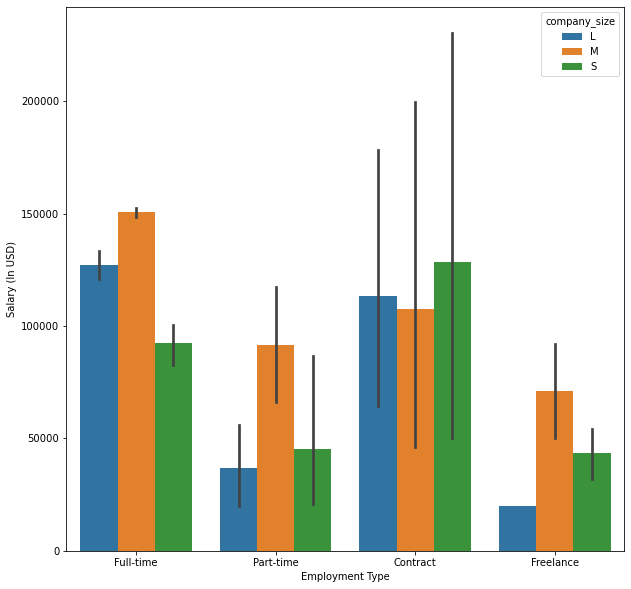

In [280]:
# Salary, Employment Type and Company Size

plt.figure(figsize = (10,10))
sns.barplot(x = "employment_type", y = "salary_in_usd", hue = "company_size", data = df)
plt.xlabel("Employment Type")
plt.ylabel("Salary (In USD)")
plt.show()

<AxesSubplot:xlabel='employment_type', ylabel='salary_in_usd'>

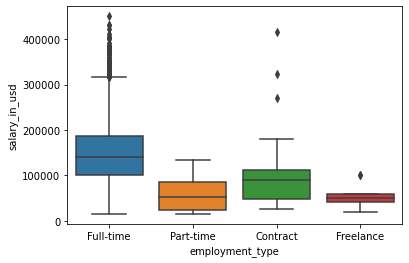

In [206]:
sns.boxplot(data = df, x = "employment_type", y = "salary_in_usd")

In [207]:
df["employment_type"].value_counts()

Full-time    5296
Contract       19
Part-time      15
Freelance      11
Name: employment_type, dtype: int64

In [129]:
df.head()

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2023,Data DevOps Engineer,Data Engineering,EUR,88000,95012,Germany,Mid-level,Full-time,Hybrid,Germany,L
1,2023,Data Architect,Data Architecture and Modeling,USD,186000,186000,United States,Senior,Full-time,In-person,United States,M
2,2023,Data Architect,Data Architecture and Modeling,USD,81800,81800,United States,Senior,Full-time,In-person,United States,M
3,2023,Data Scientist,Data Science and Research,USD,212000,212000,United States,Senior,Full-time,In-person,United States,M
4,2023,Data Scientist,Data Science and Research,USD,93300,93300,United States,Senior,Full-time,In-person,United States,M


<AxesSubplot:xlabel='work_year', ylabel='salary_in_usd'>

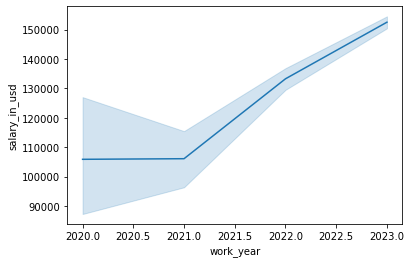

In [244]:
sns.lineplot(x = df["work_year"], y = df["salary_in_usd"])